## 드라이브 연동

####colab에서는 파일을 가져다쓰기 위해 항상 아래와 같은 코드로 google drive와 연동을 시켜주어야 합니다.

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


## 단순 선형 회귀 (키-몸무게 예측)

####가장 기본적인 선형 회귀 입니다.
####A라는 데이터셋이 있을 때, B를 예측하고 싶을때 사용하는 코드이며, 주석을 참고해주세요.
####Ex. 몸무게가 주어졌을 때, 키를 예측하는 문제

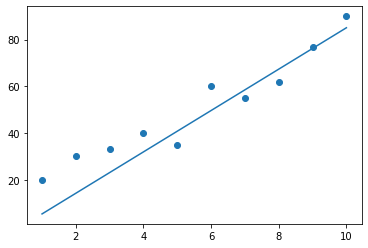

In [ ]:
import numpy as np  #numpy는 행렬 데이터를 다루기 위해 사용되며, 데이터셋이 일차원 행렬로 주어지기 때문에 numpy라는 패키지를 불러와 사용합니다.
# np란 numpy를 np라고 줄여서 사용하겠다는 의미입니다.
import matplotlib.pyplot as plt #그래프로 내가 만든 모델을 시각적으로 표현하여서 보여주기 위해 matplotlib패키지를 불러옵니다.
# plt란 앞으로 그래프를 그릴 때 plt라고 줄여 말하겠다는 의미입니다.
import pandas as pd # 파일을 불러올때 pandas패키지에서 지원하는 함수를 이용해야하기 때문에 pandas 패키지를 불러옵니다.
# pd란 pandas를 pd라고 줄여서 사용하겠다는 의미입니다.

data = pd.read_csv(r'/content/gdrive/MyDrive/kaggle/반복횟수별 점수 (2).csv')
# data라는 새로운 변수를 만듭니다, pandas약칭 pd.read_csv라는 함수는 csv함수를 불러오는 명령어로 ()안에 파일 이동경로를 붙여넣기하면 됩니다.
# csv파일이란, excel파일에서 다른이름으로 저장할 때, 저장되는 파일 형식을 csv로 지정하면 됩니다.
data.head()
# 불러온 csv파일의 머리부분을 보여준다는 표시입니다. 대략적인 데이터셋의 5-10개 정도를 출력해서 보여줍니다.

x=np.array(data['공부시간'])
# x라는 변수를 만듭니다. numpy에서 제공하는 array함수를 이용해서 x축에 들어갈 데이터를 배열형태로 만듭니다.
# 예를 들어, x축에 들어갈 데이터가 1,2,3,4,5 라면, x = [1,2,3,4,5] 형식으로 데이터를 배열 상태로 넣어줍니다.
y=np.array(data['점수'])
# y라는 변수를 만듭니다. 위와 마찬가지로 y축에 넣을 데이터를 배열 형태로 저장해줍니다.

def CostFunction(x,y,a,b):
    return sum((x*a+b-y)**2)/2/len(y)
# 비용함수(CostFunction)를 만들어줍니다. 선형회귀 비용함수에 대한 내용은 검색해보세요.
# 요약하면, 비용함수란 오차의 정도를 나타내서 적을수록 좋은 모델이라는 것입니다.
# x는 x축 데이터, y는 y축 데이터, a는 기울기 weight, b는 편향값 bias를 뜻합니다.

def Grad_a(x,y,a,b):
    return sum((a*x+b-y)*x)/len(y)
# a = weight 에 대한 기울기를 수정할 때 사용할 Grad_a함수를 정의합니다.
# 앞으로 weight에서 Grad_a값을 학습마다 빼주면서 weight값을 조정해나갑니다.
def Grad_b(x,y,a,b):
    return sum(a*x+b)/len(y)
# b = bias도 마찬가지로 위와 같이 편향값을 조정해 나갑니다.

def Train(x,y,Iteration,LearningRate):
    # x,y,반복횟수,학습률
    a,b=0,0
    # 초기 weight = a, bias = b 를 초기화해줍니다, 저는 그냥 초기 0으로 설정했습니다.
    Trace=[] 
    # 비용함수의 변화를 말합니다. 점점 학습을 하면서 비용함수가 줄어들겁니다. 
    for _ in range(Iteration):
    # 반복문을 이용하여 반복횟수만큼 학습을 돌려줍니다.
        Trace.append(CostFunction(x, y, a, b))
        # 위에서 Trace라는 배열을 만들었는데, 여기에 앞서 만들었던 비용함수 값을 넣어주면 됩니다. Trace는 비용함수를 담는 그릇입니다.
        g_a = Grad_a(x,y,a,b)
        # 앞서 a에서 뺄 값에 대한 함수를 정의했는데, g_a라는 함수로 좀 더 보기 편하게 만들어줍니다.
        g_b = Grad_b(x,y,a,b)
        # 위와 동일 이유
        a-=LearningRate*g_a
        # weight=a 값을 학습마다 조정해줍니다. -=로 재귀함수 특성을 이용해 a값에서 학습률*g_a 값을 빼줍니다.
        b-=LearningRate*g_b
        # 위와 동일
    return [a,b,Trace]
    # 함수에 대한 반환값으로 기울기,편향값,비용함수를 출력해서 보여줍니다.
# Train이라는 함수 정의, 학습을 돌릴 때 실행될 코드를 정의해줍니다.
# x는 x축 데이터, y는 y축 데이터, Iteration은 반복 횟수, LearningRate 는 학습률을 뜻합니다.
# 학습률은 검색해보세요. 요약하면 weight와 bias가 어느 비율로 수정될지 정합니다.

a,b,Trace = Train(x,y,1000,0.0001)
#여기서 0.0001은 학습률이고, 1000은 학습 반복횟수입니다.
#Train이라는 함수를 앞서 정의했고, 우리는 이제 a,b,Trace라는 변수에 넣어줍니다. 라고 이해하세요 파이썬 입니다.
plt.scatter(x,y)
# 앞서 그래프 출력하는 함수입니다, (x,y)데이터를 점으로 출력해줍니다.
plt.plot([min(x),max(x)],np.array([min(x),max(x)])*a+b)
# x,y의 최대 최소 값을 축에 표시해줍니다.
plt.show()
# 그래프 보여줍니다.

####앞선 선형회귀에서 테스트를 할 데이터와, 훈련을 할 데이터를 나누어보겠습니다.

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

data = pd.read_csv(r"/content/gdrive/MyDrive/kaggle/반복횟수별 점수_simple.csv")
data.head()

from sklearn.model_selection import train_test_split
# sklearn이라는 패키지를 불러와 함수로 test데이터와 train데이터를 분리할 수 있습니다.
x=np.array(data['공부시간'])
y=np.array(data['점수'])
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
# 앞서 sklearn이라는 패키지를 불러왔는데, train_test_split함수를 이용해서 훈련데이터는 0.8 -> 80%, 테스트데이터는 0.2->20%로 나눕니다.

def CostFunction(x,y,w,b):
    return sum((np.dot(x,w)+b-y)**2)/len(x)

def Grad_a(x,y,w,b):
    return sum((np.dot(x,w)+b-y)*x*2)/len(x)
def Grad_b(x,y,w,b):
    return sum(np.dot(x,w)+b-y)*2/len(x)

def Train(x,y,epoch,LearningRate):
    w=0
    # 앞서 a = weight라고 했는데, 헷갈리니까 w = weight라고 할게요.
    b=0
    Trace=[]
    for i in range(epoch):
      Trace.append(CostFunction(x, y, w,b))
      g_w = Grad_a(x,y,w,b)
      g_b = Grad_b(x,y,w,b)
      w-=LearningRate*g_w
      b-=LearningRate*g_b
      
      
      if i % 1000 == 0:
      # 조건문을 사용하여 위에선 시각적으로 표현해주지 않았지만, 그래프만 보여주면 잘 모르니까
      # weight , bias , 비용함수 값을 수정전과 수정후로 출력해줍니다.
      # 값에 대한 해석은 알아서 하십쇼 충분히 가능합니다. 
            print("w :", w,'\n')
            print("b :", b,'\n')
            print("cost_F :", Trace,'\n')
            print("g_w :", g_w,'\n')
            print("g_b :", g_b,'\n')
            print("up_w :", w,'\n')
            print("up_b :", b,'\n')
            plt.scatter(x,y)
            plt.plot([min(x),max(x)],np.array([min(x),max(x)])*w)
            plt.show()   
            # 그래프 출력을 앞서서는 학습이 모두 끝나고 결과만 보여줬는데
            # 여기선 학습 1000번마다 그래프를 보여주기로 합시다.
    return [w,b,Trace]

w,b,Trace = Train(x,y,10000,0.01)

UFuncTypeError: ignored

## 다중 선형 회귀 (대학교 학점)

####앞선 선형 회귀는 x가 하나인 단순 선형 회귀에 대한 내용이며, 본격적으로 x가 여러개인 다중 선형 회귀를 배우겠습니다. 

In [ ]:


# %% 회귀선
import numpy as np 
import matplotlib.pyplot as plt # 그래프
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv(r"/content/gdrive/MyDrive/kaggle/대학교 학점_다중회귀.csv")
data.head()

x=np.array([['퀴즈점수','중간점수','기말점수','과제점수']])
# x라는 특성이 여러개로, 4개의 x에 대한 특성으로 y를 예측합니다.
y=np.array(['학점'])



def CostFunction(x,y,w,b):
    return sum((np.dot(x,w)+b-y)**2)/len(x)

def Grad_a(x,y,w,b):
    return sum((np.dot(x,w)+b-y)*x)/len(x)
def Grad_b(x,y,w,b):
    return sum(np.dot(x,w)+b)/len(x)

def Train(x,y,epoch,LearningRate):
# Iteration을 반복횟수라고 했는데 마음대로 정하시면 되고, 원래 명칭은 epoch이니 epoch라고 할게요.
# 학습횟수를 딥러닝 용어로 공식적으로 epoch라고 합니다.
    w,b=0,0
    Trace=[]
    for i in range(epoch):
        if i % 100 == 0:
        #이번엔 100번마다 출력해줄거임 내마음
            print("w :", w,"/ b :",b,'\n')
            Trace.append(CostFunction(x, y, w, b))
            print("cost_F :", Trace,'\n')
            g_w = Grad_a(x,y,w,b)
            g_b = Grad_b(x,y,w,b)
            print("g_w :", g_w,"/ g_b :",g_b,'\n')
            w-=LearningRate*g_w
            b-=LearningRate*g_b
            print("up_w :", w,"/ up_b :",b,'\n')
            plt.scatter(x,y)
            plt.plot([min(x),max(x)],np.array([min(x),max(x)])*w+b)
            plt.show()
        
        
    return [a,b,Trace]

w,b,Trace = Train(x,y,1000,0.005)

w : 0 / b : 0 



UFuncTypeError: ignored

## 그외 나머지

#### 이 아래부터는 선형회귀와 관련하여 시각적으로 표현하기 좋게 만든 코드들입니다.
#### 참고해주시고 잘 활용해주세요. 선형 회귀는 위의 내용만으로 충분합니다.

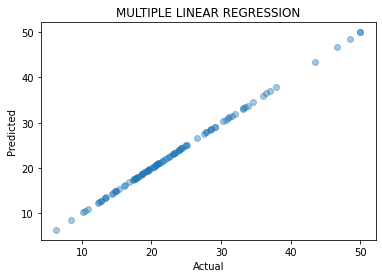

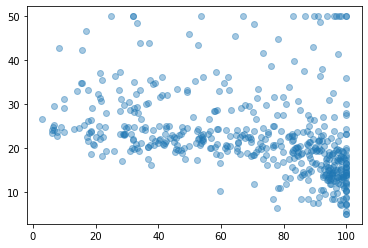

In [ ]:
# %% 회귀선
import numpy as np 
import matplotlib.pyplot as plt # 그래프
import pandas as pd

df = pd.read_csv("/content/gdrive/MyDrive/kaggle/Boston_house.csv")
df.head()

from sklearn.model_selection import train_test_split
x = df[['AGE'	,'B'	,'RM'	,'CRIM',	'DIS',	'INDUS',	'LSTAT',	'NOX',	'PTRATIO', 'RAD',	'ZN',	'TAX',	'CHAS',	'Target']]
y = df[['Target']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

y_predict = mlr.predict(x_test)

import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

# AGE와 TAarget관계
plt.scatter(df[['AGE']], df[['Target']], alpha=0.4)
plt.show()

### https://kimdingko-world.tistory.com/101
### 코드 사이트 설명

7 3


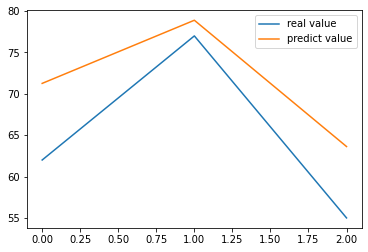

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv(r"/content/gdrive/MyDrive/kaggle/반복횟수별 점수 (2).csv")
data.head()

#'AGE'	,'B'	,'RM'	,'CRIM',	'DIS',	'INDUS',	'LSTAT',	'NOX',	'PTRATIO', 'RAD',	'ZN',	'TAX',	'CHAS',	'Target'

X = data['공부시간']
Y = data['점수']
#plt.plot(X,Y,'g.')
#plt.plot(X2,Y,'r. ')
#plt.xlabel('AGE')
#plt.ylabel('Target')

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state = 50)
print(len(x_train), len(x_test))

# 전체 데이터의 70%를 사용한 분포도 입니다.

# fig, axes = plt.subplots(2, 1)

# axes[0].plot(x_train, y_train, 'b.')
# axes[1].plot(x_test, y_test, 'r.')

# 선형회귀 모델 생성

lr = LinearRegression()
lr.fit(x_train.values.reshape(-1,1), y_train) # train 데이터 학습

#기울기 절편
[lr.coef_,lr.intercept_]

f = lambda x: lr.intercept_ + (lr.coef_ * x)

import numpy as np

x = np.array([min(x_train), max(x_train)])

# train data set
# plt.plot(x_train, y_train, 'b.')
# plt.xlabel('AGE')
# plt.ylabel('Target')
# plt.plot(x, f(x), color = 'r')

# 결정계수 값
lr.score(x_train.values.reshape(-1,1),y_train)

x = np.array([min(x_test), max(x_test)])

# test data set
# plt.plot(x_test, y_test, '.', color ='r')
# plt.xlabel('AGE')
# plt.ylabel('Target')
# plt.plot(x, f(x), color = 'blue')

# 결정계수 값
lr.score(x_test.values.reshape(-1,1),y_test)

plt.plot(y_test[:20].values.reshape(-1, 1), label="real value")
plt.plot(lr.predict(x_test[:20].values.reshape(-1,1)), label="predict value")
plt.legend()

Text(0, 0.5, '점수')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_te

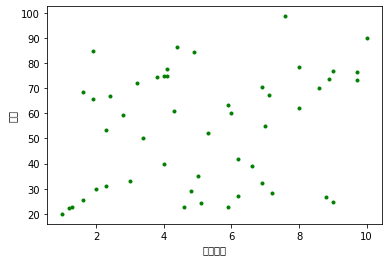

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

data = pd.read_csv(r"/content/gdrive/MyDrive/kaggle/반복횟수별 점수 (1).csv")
data.head()

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

X = data['공부시간']
Y = data['점수']
plt.plot(X,Y,'g.')
plt.xlabel('공부시간')
plt.ylabel('점수')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state = 50)
print(len(x_train), len(x_test))

35 15


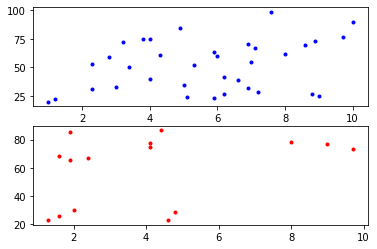

In [ ]:
# 전체 데이터의 70%를 사용한 분포도 입니다.

fig, axes = plt.subplots(2, 1)

axes[0].plot(x_train, y_train, 'b.')
axes[1].plot(x_test, y_test, 'r.')

In [ ]:
# 선형회귀 모델 생성

lr = LinearRegression()
lr.fit(x_train.values.reshape(-1,1), y_train) # train 데이터 학습

#기울기 절편
[lr.coef_,lr.intercept_]

[array([2.75369299]), 36.332234232904355]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_te

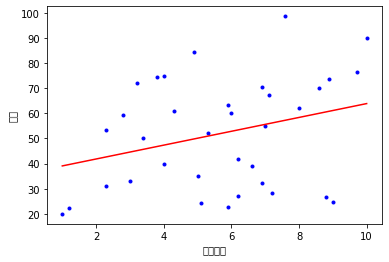

In [ ]:
f = lambda x: lr.intercept_ + (lr.coef_ * x)

import numpy as np

x = np.array([min(x_train), max(x_train)])

# train data set
plt.plot(x_train, y_train, 'b.')
plt.xlabel('공부시간')
plt.ylabel('성적')
plt.plot(x, f(x), color = 'r')

In [ ]:
# 결정계수 값
lr.score(x_train.values.reshape(-1,1),y_train)

0.09147728837454072

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_te

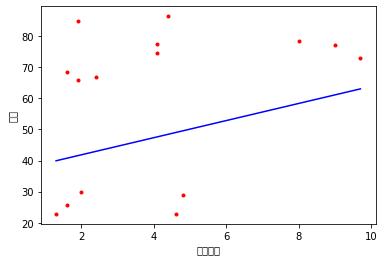

In [ ]:
x = np.array([min(x_test), max(x_test)])

# test data set
plt.plot(x_test, y_test, '.', color ='r')
plt.xlabel('공부시간')
plt.ylabel('성적')
plt.plot(x, f(x), color = 'blue')

In [ ]:
# 결정계수 값
lr.score(x_test.values.reshape(-1,1),y_test)

-0.09481977249558926

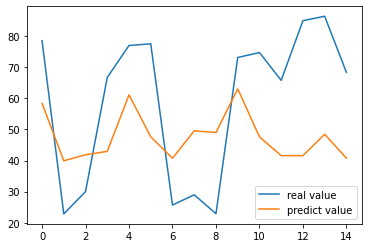

In [ ]:
plt.plot(y_test[:20].values.reshape(-1, 1), label="real value")
plt.plot(lr.predict(x_test[:20].values.reshape(-1,1)), label="predict value")
plt.legend()